Error: name 'pd' is not defined


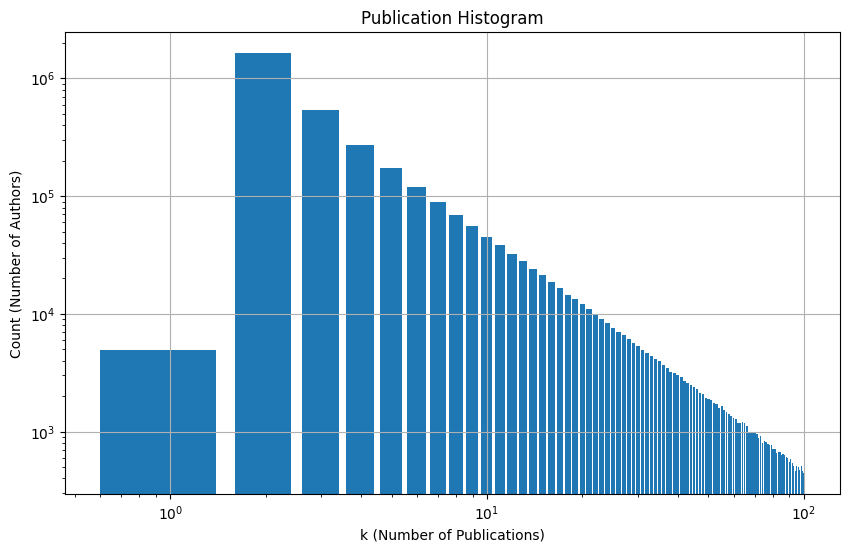

In [12]:
import psycopg2
import matplotlib.pyplot as plt

db_dblp = {
    'host': '127.0.0.1',
    'database': 'dblp',
    'user': 'postgres',
    'password': '1234'
}

query = """
SELECT k, COUNT(*) AS count
FROM (
    SELECT a.id, COUNT(*) AS k
    FROM Author a
    JOIN Authored au ON a.id = au.id
    GROUP BY a.id
) AS author_publications
WHERE k <= 100
GROUP BY k
ORDER BY k;
"""

try:
    conn = psycopg2.connect(**db_dblp)
    cursor = conn.cursor()

    cursor.execute(query)
    result = cursor.fetchall()

    k_values, count_values = zip(*result)

    plt.figure(figsize=(10, 6))
    plt.bar(k_values, count_values)
    plt.yscale('log')  
    plt.xscale('log')  
    plt.title('Publication Histogram')
    plt.xlabel('k (Number of Publications)')
    plt.ylabel('Count (Number of Authors)')
    plt.grid(True)
    
    
    output_folder = '/Users/a/Eurecom/DBSYS/Labs/code/'
    output_filename = 'vis.pdf'
    output_path = output_folder + output_filename
    plt.savefig(output_path, format='pdf')

    plt.show()
    print("The distribution appears to be a Power Law based on the plot.")

except (Exception, psycopg2.Error) as error:
    print(f"Error: {error}")

finally:
    if conn:
        cursor.close()
        conn.close()
    
